New and existing properties Pirce Comparison in the UK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/NewAndOldProperties.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141783 entries, 0 to 141782
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date                              141783 non-null  object 
 1   Region_Name                       141783 non-null  object 
 2   Area_Code                         141783 non-null  object 
 3   New_Build_Average_Price           138906 non-null  float64
 4   New_Build_Index                   138906 non-null  float64
 5   New_Build_Monthly_Change          138510 non-null  float64
 6   New_Build_Annual_Change           134178 non-null  float64
 7   New_Build_Sales_Volume            136334 non-null  float64
 8   Existing_Property_Average_Price   139110 non-null  float64
 9   Existing_Property_Index           139110 non-null  float64
 10  Existing_Property_Monthly_Change  138714 non-null  float64
 11  Existing_Property_Annual_Change   134382 non-null  f

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [6]:
data["New_Build_Average_Price"] = pd.to_numeric(data["New_Build_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


new_build_price = (
    data.groupby("Year")["New_Build_Average_Price"]
         .mean()
         .reset_index(name="New_Build_AvgPrice_UK_Yearly")
)

print(new_build_price)

    Year  New_Build_AvgPrice_UK_Yearly
0   2005                 182343.250000
1   2006                 193937.916667
2   2007                 208994.583333
3   2008                 202258.000000
4   2009                 182146.333333
5   2010                 187364.000000
6   2011                 190186.083333
7   2012                 189397.083333
8   2013                 194941.666667
9   2014                 210652.000000
10  2015                 221356.250000
11  2016                 242055.250000
12  2017                 254419.583333
13  2018                 265498.166667
14  2019                 267676.833333
15  2020                 275387.916667
16  2021                 285083.500000
17  2022                 305963.416667
18  2023                 322026.500000
19  2024                 329905.750000
20  2025                 394526.666667


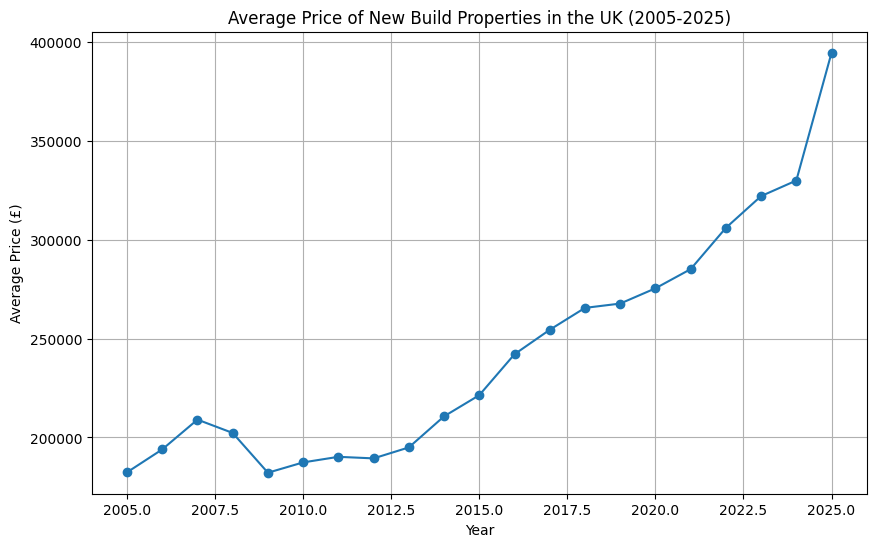

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show() 

In [8]:
data["New_Build_Annual_Change"] = pd.to_numeric(data["New_Build_Annual_Change"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


newbuild_yearly_change = (
    data.groupby("Year")["New_Build_Annual_Change"]
         .mean()
         .reset_index(name="New_Build_AvgChange_UK_Yearly")
)

print(newbuild_yearly_change)

    Year  New_Build_AvgChange_UK_Yearly
0   2005                            NaN
1   2006                       6.366667
2   2007                       7.775000
3   2008                      -3.066667
4   2009                      -9.600000
5   2010                       2.866667
6   2011                       1.525000
7   2012                      -0.400000
8   2013                       2.908333
9   2014                       8.058333
10  2015                       5.091667
11  2016                       9.358333
12  2017                       5.150000
13  2018                       4.366667
14  2019                       0.816667
15  2020                       2.908333
16  2021                       3.550000
17  2022                       7.325000
18  2023                       5.275000
19  2024                       2.441667
20  2025                      21.800000


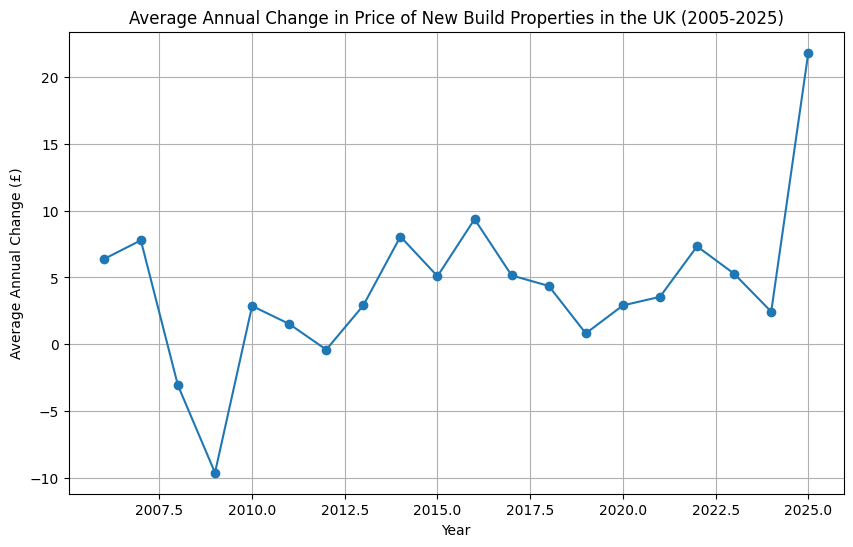

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o')
plt.title("Average Annual Change in Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Annual Change (£)")
plt.grid()
plt.show()

In [10]:
data["Existing_Property_Average_Price"] = pd.to_numeric(data["Existing_Property_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


existing_property_price = (
    data.groupby("Year")["Existing_Property_Average_Price"]
         .mean()
         .reset_index(name="Existing_Property_AvgPrice_UK_Yearly")
)

print(existing_property_price)


    Year  Existing_Property_AvgPrice_UK_Yearly
0   2005                         140852.416667
1   2006                         152134.166667
2   2007                         167548.916667
3   2008                         159860.583333
4   2009                         145826.500000
5   2010                         154714.416667
6   2011                         152016.333333
7   2012                         152698.416667
8   2013                         156566.000000
9   2014                         169126.583333
10  2015                         179282.500000
11  2016                         191494.916667
12  2017                         200137.750000
13  2018                         206382.083333
14  2019                         208461.750000
15  2020                         214619.583333
16  2021                         233594.166667
17  2022                         255830.833333
18  2023                         255845.250000
19  2024                         257693.750000
20  2025     

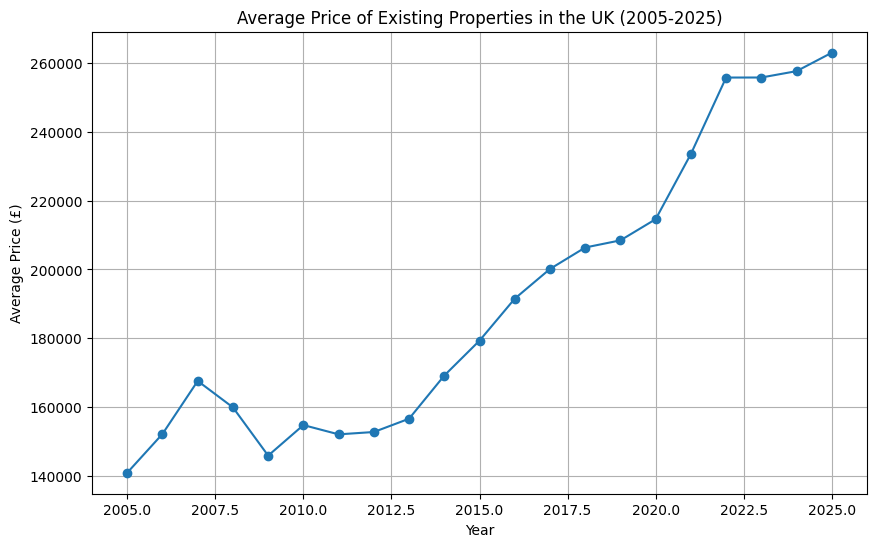

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(existing_property_price["Year"], existing_property_price["Existing_Property_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of Existing Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show() 

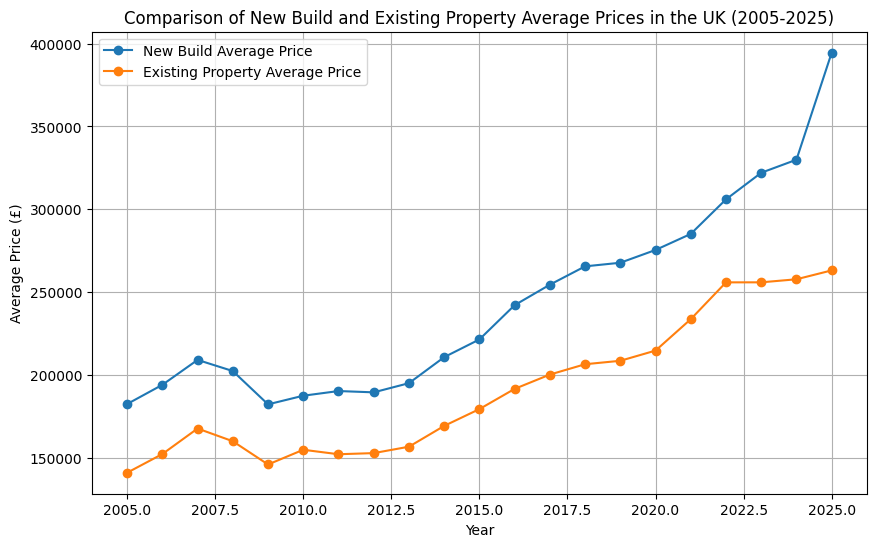

In [12]:
#Compare new build and existing property prices
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o', label='New Build Average Price')
plt.plot(existing_property_price["Year"], existing_property_price["Existing_Property_AvgPrice_UK_Yearly"], marker='o', label='Existing Property Average Price')
plt.title("Comparison of New Build and Existing Property Average Prices in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid()
plt.show()

In [13]:
data["Existing_Property_Annual_Change"] = pd.to_numeric(data["Existing_Property_Annual_Change"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


existing_property_yearly_change = (
    data.groupby("Year")["Existing_Property_Annual_Change"]
         .mean()
         .reset_index(name="Existing_Property_AvgChange_UK_Yearly")
)

print(existing_property_yearly_change)

    Year  Existing_Property_AvgChange_UK_Yearly
0   2005                                    NaN
1   2006                               7.991667
2   2007                              10.150000
3   2008                              -4.433333
4   2009                              -8.458333
5   2010                               6.183333
6   2011                              -1.733333
7   2012                               0.441667
8   2013                               2.533333
9   2014                               8.000000
10  2015                               6.016667
11  2016                               6.841667
12  2017                               4.500000
13  2018                               3.125000
14  2019                               1.000000
15  2020                               2.950000
16  2021                               8.850000
17  2022                               9.558333
18  2023                               0.066667
19  2024                               0

Text(0, 0.5, 'Average Annual Change (£)')

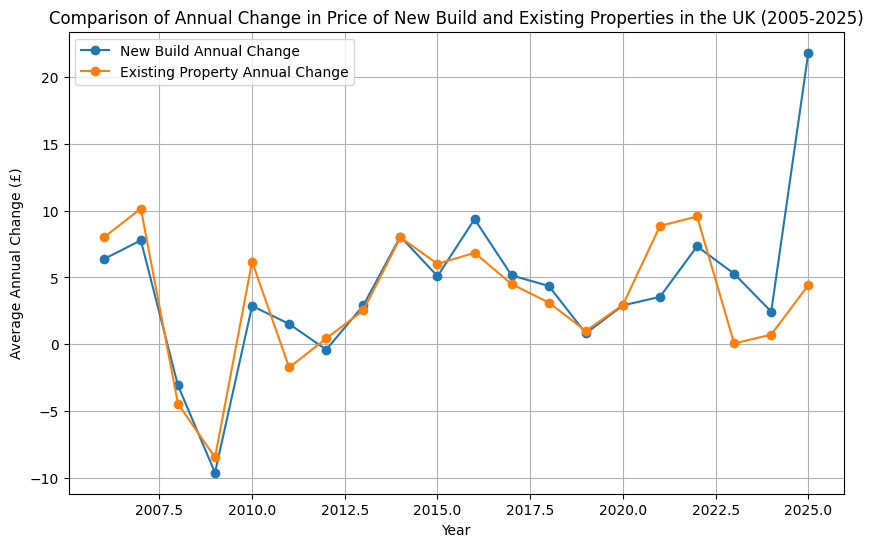

In [16]:
#plot new build vs existing property annual change
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o', label='New Build Annual Change')
plt.plot(existing_property_yearly_change["Year"], existing_property_yearly_change["Existing_Property_AvgChange_UK_Yearly"], marker='o', label='Existing Property Annual Change')
plt.title("Comparison of Annual Change in Price of New Build and Existing Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.ylabel("Average Annual Change (£)")

In [17]:
# UK inflation rate data
inflation_data = pd.read_csv('./Data/uk_inflation.csv')

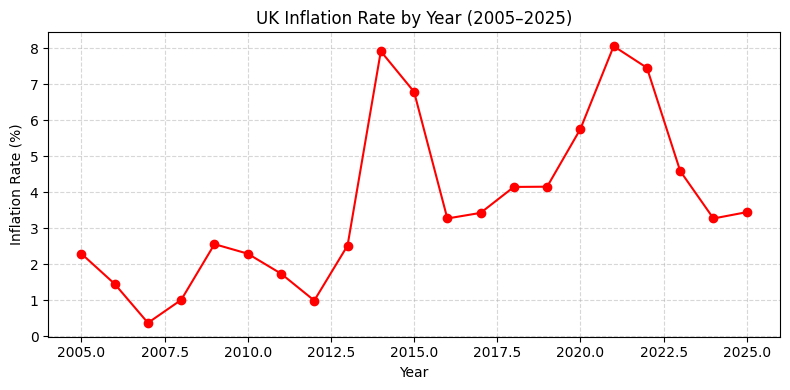

In [18]:
# inflation rate visualization
plt.figure(figsize=(8, 4))
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("UK Inflation Rate by Year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

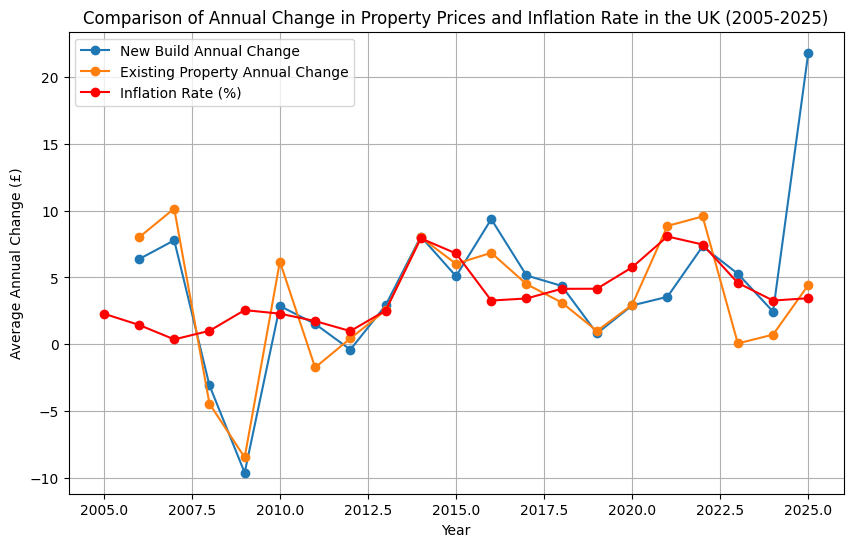

In [22]:
# compare inflation with property price changes
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o', label='New Build Annual Change')
plt.plot(existing_property_yearly_change["Year"], existing_property_yearly_change["Existing_Property_AvgChange_UK_Yearly"], marker='o', label='Existing Property Annual Change')
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", color="red", label='Inflation Rate (%)')
plt.title("Comparison of Annual Change in Property Prices and Inflation Rate in the UK (2005-2025)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.ylabel("Average Annual Change (£)")
plt.show()

In [23]:
#Combine all new data into a single DataFrame
combined_data = pd.merge(new_build_price, existing_property_price, on="Year")

In [24]:
combined_data.head()

,Year,New_Build_AvgPrice_UK_Yearly,Existing_Property_AvgPrice_UK_Yearly
0,2005,182343.250000,140852.416667
1,2006,193937.916667,152134.166667
2,2007,208994.583333,167548.916667
3,2008,202258.000000,159860.583333
4,2009,182146.333333,145826.500000


In [29]:
#combine all annual change data with inflation data
combined_annual_change = pd.merge(newbuild_yearly_change, existing_property_yearly_change, on="Year")
combined_annual_change = pd.merge(combined_annual_change, inflation_data, on="Year")
combined_annual_change.head()

,Year,New_Build_AvgChange_UK_Yearly,Existing_Property_AvgChange_UK_Yearly,Inflation_Consumer_Prices_Annual_Percent
0,2005,NaN,NaN,2.291667
1,2006,6.366667,7.991667,1.451120
2,2007,7.775000,10.150000,0.368047
3,2008,-3.066667,-4.433333,1.008417
4,2009,-9.600000,-8.458333,2.557756


In [30]:
cols = [
    'New_Build_AvgChange_UK_Yearly',
    'Existing_Property_AvgChange_UK_Yearly'
]

combined_annual_change[cols] = combined_annual_change[cols].bfill() 

In [31]:
combined_annual_change.head()

,Year,New_Build_AvgChange_UK_Yearly,Existing_Property_AvgChange_UK_Yearly,Inflation_Consumer_Prices_Annual_Percent
0,2005,6.366667,7.991667,2.291667
1,2006,6.366667,7.991667,1.451120
2,2007,7.775000,10.150000,0.368047
3,2008,-3.066667,-4.433333,1.008417
4,2009,-9.600000,-8.458333,2.557756


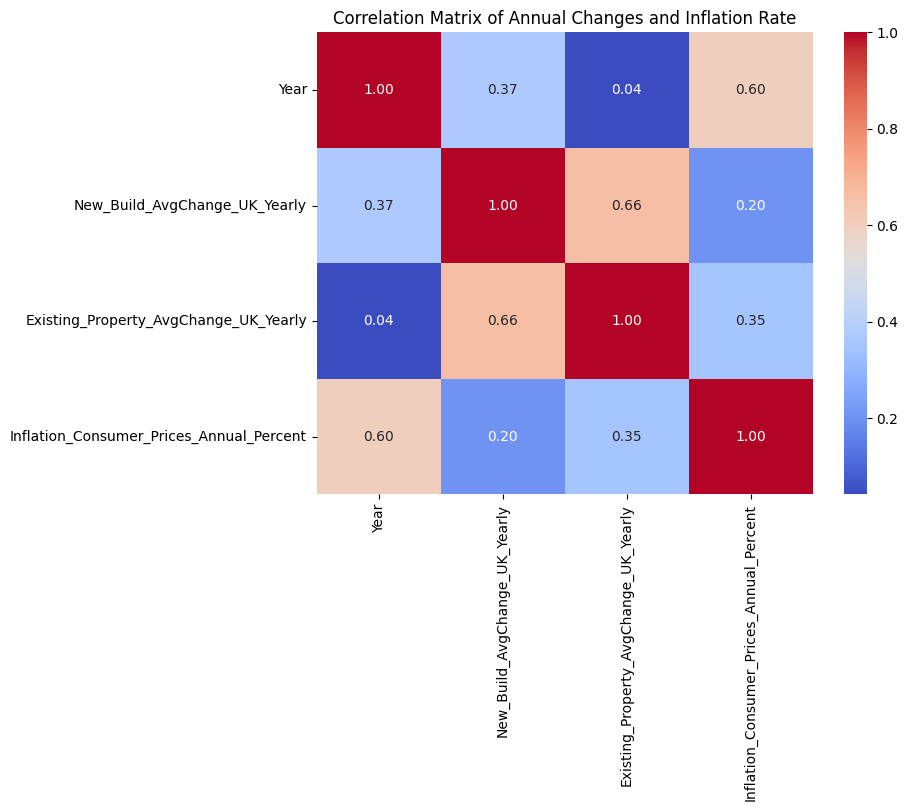

In [32]:
#corelation matrix plot
import seaborn as sns
corr = combined_annual_change.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Annual Changes and Inflation Rate")
plt.show()
